In [ ]:
# Code to generate all possible grid sizes (m,n) in which there are N squares.
import numpy as np

# Specify number of squares to create
N = 100

# Find closest N^chess
def sumsq(k):  #sum of squares up to k
    return int(k*(k+1)*(2*k+1)/6)

m = 0
Nchess = 1
while Nchess<=N:
    m += 1
    Nchess = sumsq(m)
    
# Smallest chessboard
mmax = m-1


# Solve eq (3) for n
def nfunc(m,N):
    return (6*N/(m*(m+1)) + m -1)/3

m_list = range(1, mmax+1)
n_list = [nfunc(m,N) for m in m_list]

# Which elements of n_list are integers?
int_pos = [n.is_integer() for n in n_list]

# Fancy list comprehension to keep only integer solutions (m,n)
n_ints = [int(n) for  n, boo in zip(n_list, int_pos) if boo]
m_ints = [m for  m, boo in zip(m_list, int_pos) if boo]

# Number of lines = m+n+2
l = np.array(m_ints) + n_ints + 2

# Repor all solutions
print(f'All solutions for N={N}')
for m, n in zip(m_ints, n_ints):
    print(m,n)

print(f'Minimum number of lines needed = {m+n+2}')


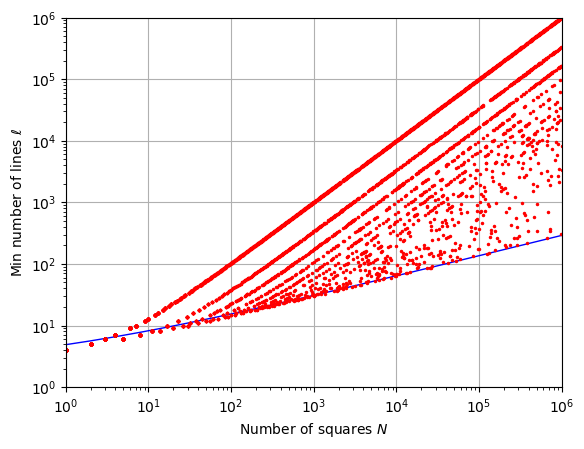

In [5]:
# Code to plot l_min against N.

import numpy as np
import matplotlib.pyplot as plt

# List of number of squares to investigate
Narray = np.floor(np.logspace(0,6,5000))
L_min = []

def sumsq(k):  #sum of squares up to k
    return int(k*(k+1)*(2*k+1)/6)
def nfunc(m,N):
    return (6*N/(m*(m+1)) + m -1)/3

for N in Narray:
    # Find closest N^chess
    m = 0
    Nchess = 1
    while Nchess<=N:
        m += 1
        Nchess = sumsq(m)

    # Smallest chessboard
    mmax = m-1

    # Solve eq (3) for n

    m_list = range(1, mmax+1)
    n_list = [nfunc(m,N) for m in m_list]

    # Which elements of n_list are integers?
    int_pos = [n.is_integer() for n in n_list]
    
    # Fancy list comprehension to keep only integer solutions (m,n)
    n_ints = [int(n) for  n, boo in zip(n_list, int_pos) if boo]
    m_ints = [m for  m, boo in zip(m_list, int_pos) if boo]

    # Last answer is the optimal config
    l_min = m_ints[-1] + n_ints[-1] + 2

    L_min.append(l_min)


plt.loglog(Narray, 2*((3*Narray)**(1/3)+1), 'b', lw=1)
plt.loglog(Narray, L_min, 'r.', ms=3)
plt.xlim(1,max(Narray))
plt.ylim(1,max(Narray))
plt.xlabel('Number of squares $N$')
plt.ylabel('Min number of lines $\ell$')
plt.grid()
#plt.savefig('fig_scatter.pdf')
plt.show()